# Bike Sharing Data Analysis 1

By Connor Doman, 54208111

COSC 301 Group 14

Section 101 2022W1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
import project_functions1 as pf

## Research question/interests 🚲

What interested me most about this dataset are the implications about user behavior. I was curious about the differences between casual and registered users, and how they might be affected by weather, holidays, and other factors. I also wanted to see if there were any interesting trends in the data that could be used to predict future behavior. It's interesting to predict something about user behavior—like how commuters might use the most bikes on weekdays—and then see if the data supports that prediction (it does). The emergent properties of data are interesting to me as well, such as why there are so many more registered users than casual ones, or how particular days seem busier until you realize they are holidays or the days of other major events.

Not to mention, I'm a big fan of walkable cities and reducing the usage of cars so diving into this dataset was a lot of fun. 

## Data 📊

This data was generated by a company called [Capital Bikeshare](https://capitalbikeshare.com), based out of Washington D.C. They allow users to rent bikes placed around the city through their app and account system, much like [Lime](https://www.li.me) scooters, or [Citi Bike](https://citibikenyc.com). While the data was provided by Capital Bikeshare, it was [compiled by Hadi Fanaee-T](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset) at the University of California Irvine. The primary subset of data we used was the `hours` dataset, which records a count of rentals, among other details, for every hour of every day between January 1, 2011 and December 31, 2012. A summary of the data is as follows:

In [ ]:
import pandas as pd

df = pd.read_csv('../data/raw/Bike-Sharing-Dataset/hour.csv')

display(df.head())

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Milestone 3 🚏

## Task 2 (Which is Basically Task 1)

### 1. Load Data

In [ ]:
# Understanding variables
hour_df = pd.read_csv('../data/raw/Bike-Sharing-Dataset/hour.csv')
display(hour_df.shape)
display(hour_df.nunique(axis=0))
display(hour_df.head())
display(hour_df.describe())
display(hour_df.columns)

(17379, 18)

Unnamed: 0    17379
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.0000,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4344.5000,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8689.0000,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13033.5000,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17378.0000,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Index(['Unnamed: 0', 'instant', 'dteday', 'season', 'yr', 'mnth', 'hr',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

### 2. Clean Data

#### Drop Columns With More Than 40% Null Values

In [ ]:

NA_cols = hour_df.isna().sum()

def na_filter(na, threshold = 0.4):
    """Filter columns with more than 40% null values"""
    col_pass = []
    for i in na.keys():
        if na[i]/hour_df.shape[0] < threshold:
            col_pass.append(i)
    return col_pass

hour_df = hour_df[na_filter(NA_cols)]
display(hour_df.columns)


Index(['Unnamed: 0', 'instant', 'dteday', 'season', 'yr', 'mnth', 'hr',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

#### Drop Columns `yr`, `mnth`, `atemp`, `windspeed`, and `instant`

In [ ]:
# drop columns
for c in ['instant', 'mnth', 'yr', 'atemp', 'windspeed']:
    if c not in hour_df.columns:
        continue
    hour_df = hour_df.drop(c, axis=1)
display(hour_df.head())

,Unnamed: 0,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
0,0,2011-01-01,1,0,0,6,0,1,0.24,0.81,3,13,16
1,1,2011-01-01,1,1,0,6,0,1,0.22,0.80,8,32,40
2,2,2011-01-01,1,2,0,6,0,1,0.22,0.80,5,27,32
3,3,2011-01-01,1,3,0,6,0,1,0.24,0.75,3,10,13
4,4,2011-01-01,1,4,0,6,0,1,0.24,0.75,0,1,1


#### Drop Rows That are Null Values

In [ ]:
# Drop null Values -> there are none
hour_df = hour_df.dropna(axis=0)
display(hour_df.shape)
display(hour_df.describe())

(17379, 13)

,Unnamed: 0,season,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,2.501640,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,35.676218,153.786869,189.463088
std,5017.0295,1.106918,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,49.305030,151.357286,181.387599
min,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4344.5000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,4.000000,34.000000,40.000000
50%,8689.0000,3.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,17.000000,115.000000,142.000000
75%,13033.5000,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,48.000000,220.000000,281.000000
max,17378.0000,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,367.000000,886.000000,977.000000


### 3. Process Data

In [ ]:
# No processing necesssary outside of cleaning

### 4. Wrangle Data

#### Reorder columns to be more relevant

In [ ]:
new_col_order = ['dteday', 'hr', 'cnt', 'casual', 'registered', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum']
display(hour_df[new_col_order].head())

,dteday,hr,cnt,casual,registered,season,holiday,weekday,workingday,weathersit,temp,hum
0,2011-01-01,0,16,3,13,1,0,6,0,1,0.24,0.81
1,2011-01-01,1,40,8,32,1,0,6,0,1,0.22,0.80
2,2011-01-01,2,32,5,27,1,0,6,0,1,0.22,0.80
3,2011-01-01,3,13,3,10,1,0,6,0,1,0.24,0.75
4,2011-01-01,4,1,0,1,1,0,6,0,1,0.24,0.75


## Task 3

In [ ]:
import pandas as pd

hours = pd.read_csv('../data/raw/Bike-Sharing-Dataset/hour.csv')

# Method chaining

new_col_order = ['date', 'hour', 'count', 'casual', 'reg', 'season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum']

hours = (hours.drop(['instant', 'mnth', 'yr', 'atemp', 'windspeed'], axis=1)
         .dropna(axis=0)
         .rename(columns={"dteday": "date", "hr": "hour", "cnt": "count", "registered": "reg"})
         .sort_values("count", ascending=False))[new_col_order]

display(hours.head())

,date,hour,count,casual,reg,season,holiday,weekday,workingday,weathersit,temp,hum
14773,2012-09-12,18,977,91,886,3,0,3,1,1,0.66,0.44
14964,2012-09-20,17,976,91,885,3,0,4,1,1,0.64,0.50
14748,2012-09-11,17,970,168,802,3,0,2,1,1,0.70,0.28
14725,2012-09-10,18,968,111,857,3,0,1,1,1,0.62,0.35
15084,2012-09-25,17,967,107,860,4,0,2,1,1,0.66,0.39


### Wrap Method Chain in a Function

In [ ]:
def load_and_process(url_or_path_to_csv_file):
    # Method Chain 1 (Load data and deal with missing data)
    
    new_col_order = ['date', 'hour', 'count', 'casual', 'reg', 'season', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'humidity']
    
    df1 = (
        pd.read_csv(url_or_path_to_csv_file)[new_col_order]
        .drop(['instant', 'mnth', 'yr', 'atemp', 'windspeed'], axis=1)
        .dropna(axis=0)
        .rename(columns={"dteday": "date", "hr": "hour", "cnt": "count", "hum": "humidity"})
        .sort_values("count", ascending=False)
    )
    
    return df1

### Import from External File

In [ ]:
import project_functions1 as pf
df = pf.load_and_process('../data/raw/Bike-Sharing-Dataset/hour.csv')
display(df.head())

,date,hour,count,casual,registered,season,holiday,weekday,workingday,weather,temp,humidity
14773,2012-09-12,18:00h,977,91,886,3,0,Wednesday,1,1,0.66,0.44
14964,2012-09-20,17:00h,976,91,885,3,0,Thursday,1,1,0.64,0.50
14748,2012-09-11,17:00h,970,168,802,3,0,Tuesday,1,1,0.70,0.28
14725,2012-09-10,18:00h,968,111,857,3,0,Monday,1,1,0.62,0.35
15084,2012-09-25,17:00h,967,107,860,4,0,Tuesday,1,1,0.66,0.39


---

## Refined and finalized versions of these functions are in [project_functions1.py](project_functions1.py)

---

## Task 4

### Questions of interest

- What days of the week have the most bike rentals?
- What holidays have the most bike rentals?
- What weather conditions have the most bike rentals?

[Text(0, 0, 'Friday'),
 Text(1, 0, 'Thursday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Saturday'),
 Text(5, 0, 'Monday'),
 Text(6, 0, 'Sunday')]

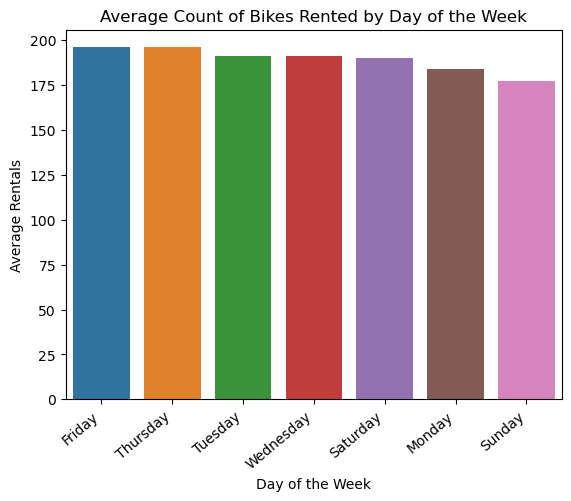

In [ ]:
import seaborn as sns

df_to_analyze = pf.load_and_process('../data/raw/Bike-Sharing-Dataset/hour.csv')

# SELECT AVG(count) AS avgCount FROM df_to_analyze GROUP BY weekday
day_of_the_week = df_to_analyze.loc[:, ['count', 'weekday']].groupby(['weekday'], as_index=False).mean().round().sort_values('count', ascending=False)

# display(day_of_the_week)

ax = sns.barplot(data=day_of_the_week, x='weekday', y='count')
ax.set_title('Average Count of Bikes Rented by Day of the Week')
ax.set(xlabel='Day of the Week', ylabel='Average Rentals')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


~~It seems that the days of the week with the most bike rentals are 4 (Friday) and 5 (Saturday). These make sense, as these are the days that people are most likely to be off work later in the day and have time to ride bikes.~~

**Note:** after further analysis and refinement of my code, these days should actually be Thursday and Friday. This is reflected in the graph above as the data is up to date. This is an interesting change and is less clear as to what is going on. Friday may make sense, as those going out in the evening may make use of the bikes. Thursday, however, is a bit more confusing. It could be that people are using the bikes to get to work, or that people are using the bikes to get to the bars and restaurants on Thursday night. Either way, it's interesting to see that Thursday is the second most popular day for bike rentals.

---

This begs another question:

### Which time of day has the most bike rentals?

[Text(0, 0, '17:00h'),
 Text(1, 0, '18:00h'),
 Text(2, 0, '8:00h'),
 Text(3, 0, '19:00h'),
 Text(4, 0, '16:00h'),
 Text(5, 0, '13:00h'),
 Text(6, 0, '15:00h'),
 Text(7, 0, '14:00h'),
 Text(8, 0, '20:00h'),
 Text(9, 0, '9:00h'),
 Text(10, 0, '7:00h'),
 Text(11, 0, '11:00h'),
 Text(12, 0, '10:00h'),
 Text(13, 0, '21:00h'),
 Text(14, 0, '12:00h'),
 Text(15, 0, '22:00h'),
 Text(16, 0, '23:00h'),
 Text(17, 0, '6:00h'),
 Text(18, 0, '1:00h'),
 Text(19, 0, '2:00h'),
 Text(20, 0, '5:00h'),
 Text(21, 0, '3:00h'),
 Text(22, 0, '4:00h')]

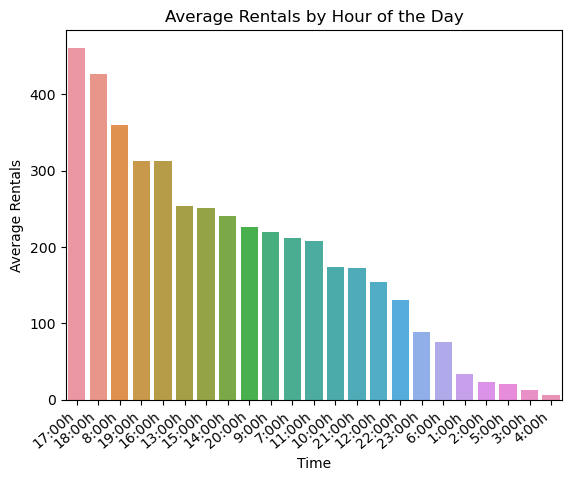

In [ ]:
# SELECT AVG(count) AS avgCount FROM df_to_analyze GROUP BY hour
hour_of_the_day = df_to_analyze.loc[:, ['count', 'hour']].groupby(['hour'], as_index=False).mean().round().sort_values('count', ascending=False)

# display(hour_of_the_day)

ax = sns.barplot(data=hour_of_the_day, x='hour', y='count')
ax.set_title("Average Rentals by Hour of the Day")
ax.set(xlabel='Time', ylabel='Average Rentals')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

It seems that 17:00h, or 5pm, has the most rentals on any given day. This also makes sense, as it is a rush hour commuter time. The next highest hours are 6pm and 8am, which are also rush hour times.

---

### What about holidays?

[Text(0, 0, 'Independence Day (2012)'),
 Text(0, 1, 'Easter Monday (2012)'),
 Text(0, 2, 'Veterans Day (2012)'),
 Text(0, 3, 'Independence Day (2011)'),
 Text(0, 4, 'Memorial Day (2012)'),
 Text(0, 5, 'Labor Day (2012)'),
 Text(0, 6, 'Columbus Day (2012)'),
 Text(0, 7, 'Columbus Day (2011)'),
 Text(0, 8, 'Memorial Day (2011)'),
 Text(0, 9, 'Veterans Day (2011)'),
 Text(0, 10, 'Labor Day (2011)'),
 Text(0, 11, 'Presidents Day (2012)'),
 Text(0, 12, 'Easter Monday (2011)'),
 Text(0, 13, 'Thanksgiving (2012)'),
 Text(0, 14, 'Martin Luther King Jr. Day (2012)'),
 Text(0, 15, 'New Years (2012)'),
 Text(0, 16, 'Veterans Day (2011)'),
 Text(0, 17, 'Veterans Day (2011)'),
 Text(0, 18, 'Presidents Day (2011)'),
 Text(0, 19, 'Christmas Day (2012)'),
 Text(0, 20, 'Martin Luther King Jr. Day (2011)')]

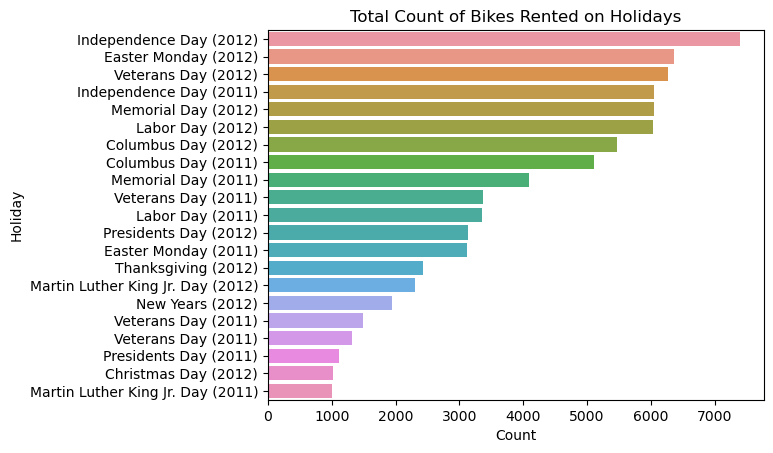

In [ ]:
# SELECT SUM(count) AS totalCount FROM df_to_analyze WHERE holiday = 1 GROUP BY date HAVING ORDER BY totalCount DESC;
holiday = df_to_analyze[['date', 'count']].loc[df['holiday'] == 1].groupby(['date',], as_index=False).sum().sort_values('count', ascending=False)
#.groupby(['holiday'], as_index=False).mean().round().sort_values('count', ascending=False)

xlabels = holiday['date'].dt.strftime('%Y-%m-%d').unique()

mnth_day = holiday['date'].dt.strftime('%m-%d').unique()

holiday_strings = {
    '01-02': 'New Years',
    '01-16': 'Martin Luther King Jr. Day',
    '01-17': 'Martin Luther King Jr. Day',
    '02-20': 'Presidents Day',
    '02-21': 'Presidents Day',
    '04-15': 'Easter Monday',
    '04-16': 'Easter Monday',
    '05-28': 'Memorial Day',
    '05-30': 'Memorial Day',
    '07-04': 'Independence Day',
    '09-03': 'Labor Day',
    '09-05': 'Labor Day',
    '10-08': 'Columbus Day',
    '10-10': 'Columbus Day',
    '11-11': 'Veterans Day',
    '11-12': 'Veterans Day',
    '11-22': 'Thanksgiving',
    '11-24': 'Thanksgiving',
    '12-25': 'Christmas Day',
    '12-26': 'Christmas Day',
}

for k,v in holiday_strings.items():
    for d in range(len(xlabels)):
        if k in xlabels[d]:
            xlabels[d] = f"{v} ({xlabels[d][:4]})"


ax = sns.barplot(data=holiday, y='date', x='count')
ax.set_title("Total Count of Bikes Rented on Holidays")
ax.set(xlabel='Count', ylabel='Holiday')
ax.set_yticklabels(labels=xlabels)

The single day with the most rentals was July 4, 2012, which makes sense. ~~Surprisingly, the days with next most rentals were Easter 2012 and Veteran's Day 2012.~~ **Note:** later analysis found that April 15th/16th was not Easter Monday, but possibly Emancipation Day, a D.C. specific holiday. This is outlined more completely in my [final analysis](../final_report_group14.md#question-1-connor). While Veteran's Day was surprising, it makes sense as there are parades and processions and a lot of outdoor gatherings. ~~Easter makes less sense outside of the fact that it is a day many people have off work.~~

In [ ]:
# SELECT AVG(count) AS avgCount FROM df_to_analyze WHERE date LIKE '%-11-%' GROUP BY date;
# november = df_to_analyze[['date', 'count']].loc[df['date'].str.contains('2012-11-')].groupby(['date',], as_index=False).mean().round().sort_values('count', ascending=False).mean().round()
# november = df_to_analyze.groupby(pd.PeriodIndex(df['date'], freq="D"))['count'].sum().mean()

display(f"Average rentals in November 2012: {pf.get_avg_from_month(df_to_analyze, 11, year=2012)}")
display(f"Rentals on November 12, 2012: {pf.get_avg_from_month(df_to_analyze, 11, day=12, year=2012)}")

'Average rentals in November 2012: 213.0'

'Rentals on November 12, 2012: 261.0'

We can see that the rentals on Veteran's Day are still over 20% higher than the average rental in November that year, which indicates the circumstance of Veteran's Day was a major factor in the high rentals. This day was a Monday, too, which removes the implication that it was a weekend day or people were out late.

In [ ]:
# Export to CSV
df = pf.load_and_process('../data/raw/Bike-Sharing-Dataset/hour.csv')
df.to_csv('../data/processed/connor_hour.csv', index=False)

# print(pd.read_csv('../data/raw/Bike-Sharing-Dataset/hour.csv').columns)
display(df.head())

,date,hour,count,casual,registered,season,holiday,weekday,workingday,weather,temp,humidity
14773,2012-09-12,18:00h,977,91,886,3,0,Wednesday,1,1,0.66,0.44
14964,2012-09-20,17:00h,976,91,885,3,0,Thursday,1,1,0.64,0.50
14748,2012-09-11,17:00h,970,168,802,3,0,Tuesday,1,1,0.70,0.28
14725,2012-09-10,18:00h,968,111,857,3,0,Monday,1,1,0.62,0.35
15084,2012-09-25,17:00h,967,107,860,4,0,Tuesday,1,1,0.66,0.39


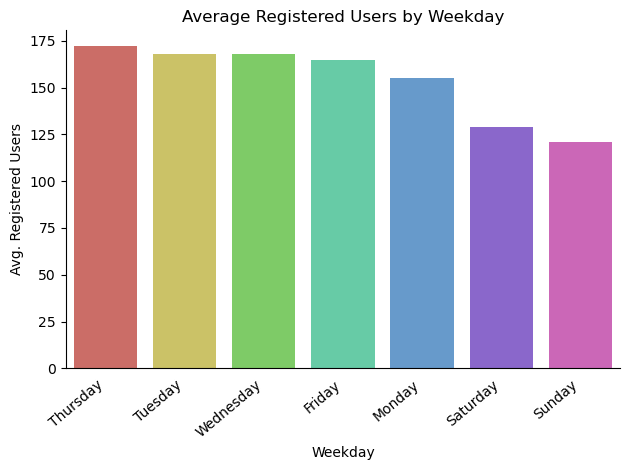

In [ ]:
pf.get_reg_users_from_week_df(df)

ax = pf.avg_reg_users_barplot(df)
pf.save_fig(ax, "../images/avg_reg_users_barplot.png")

Dataframe of users by year:
      Total Users
date             
2012      2049576
2011      1243103


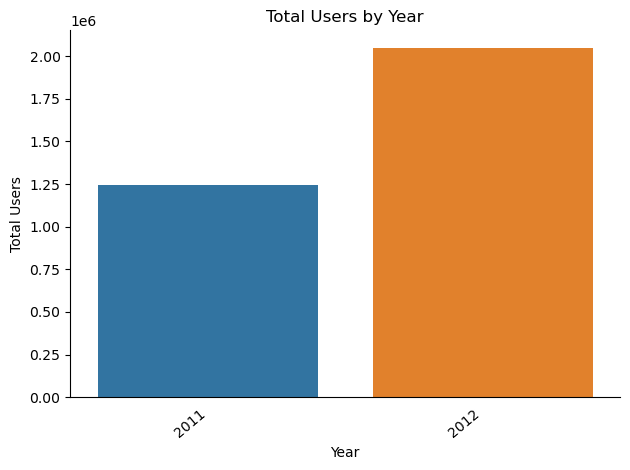

In [ ]:
print(f"Dataframe of users by year:\n{pf.get_count_users_years_df(df)}")
ax = pf.get_annual_users_barplot(df)
pf.save_fig(ax, "../images/annual_users_barplot.png")

## Improved Holidays Graph

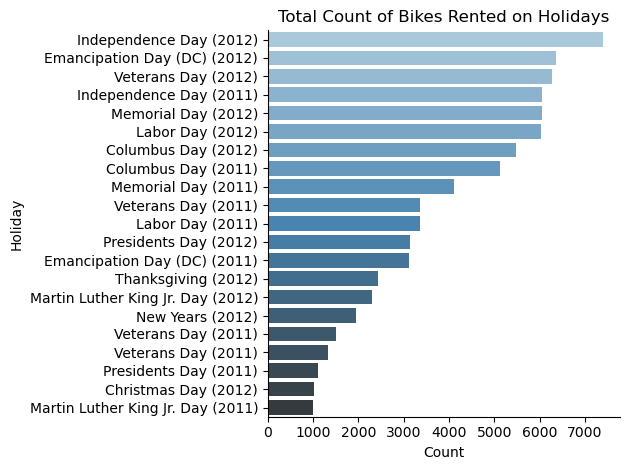

In [ ]:
ax = pf.create_count_by_holiday_barplot(df)
pf.save_fig(ax, "../images/count_by_holiday_barplot.png")

## Emancipation Day 2012 vs 2011

After diving in deep (on the calendar) I found that April 15th/16th may have possibly been Emancipation Day. Under this assumption, I needed to visualize the data to try and determine the disparity between ridership in 2011 and 2012.

In [ ]:
df['weather'].loc[df['date'] == '2012-04-16'].mean()

emance12 = df['count'].loc[df['date'] == '2012-04-16'].sum()
emance11 = df['count'].loc[df['date'] == '2011-04-15'].sum()

print(f"2012: {emance12}", f"2011: {emance11}", f"Ratio 2011/2012: {emance11 / emance12 * 100}", sep='\n')

print(f"Emancipation Day 2012 had {math.floor(emance12 / emance11 * 100)}% the rentals of Emancipation Day 2011")

2012: 6370
2011: 3126
Ratio 2011/2012: 49.07378335949765
Emancipation Day 2012 had 203% the rentals of Emancipation Day 2011


## Weather Trends

Text(0.5, 1.0, 'Counts of Weather Conditions in April 2012')

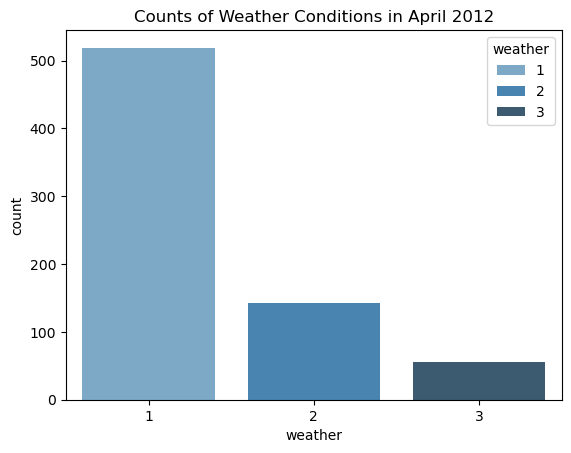

In [ ]:
df[['weather', 'date']].loc[lambda row: row['date'].dt.strftime("%Y-%m") == "2012-04"].groupby(['date'], as_index=False).count()

weather_df = df[['weather', 'date']].loc[lambda row: row['date'].dt.strftime("%Y-%m") == "2012-04"]
ax = sns.countplot(data=weather_df, x='weather', hue='weather', dodge=False, palette='Blues_d')
ax.set_title("Counts of Weather Conditions in April 2012")

Text(0.5, 1.0, 'Counts of Weather Conditions on Emancipation Day 2012')

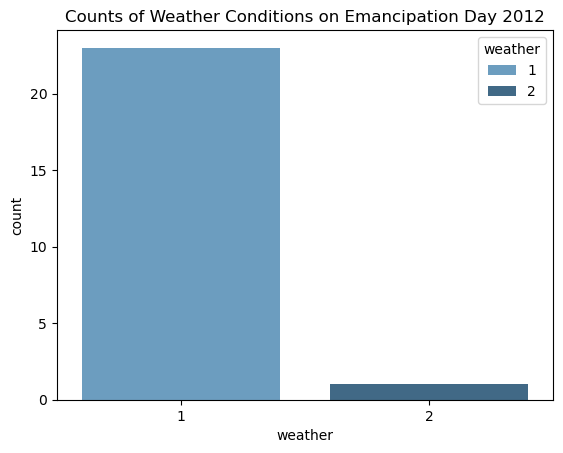

In [ ]:
weather_df_2 = df[['weather', 'date']].loc[lambda row: row['date'].dt.strftime("%Y-%m-%d") == "2012-04-16"]
ax2 = sns.countplot(data=weather_df_2, x='weather', hue='weather', dodge=False, palette='Blues_d')
ax2.set_title("Counts of Weather Conditions on Emancipation Day 2012")

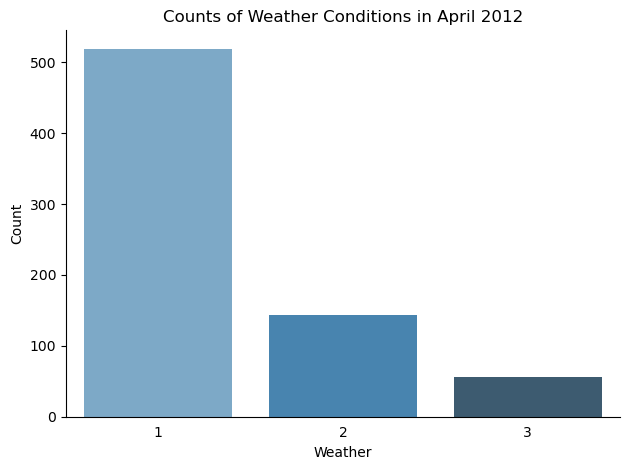

In [ ]:
pf.save_april_weather_barplot(df)

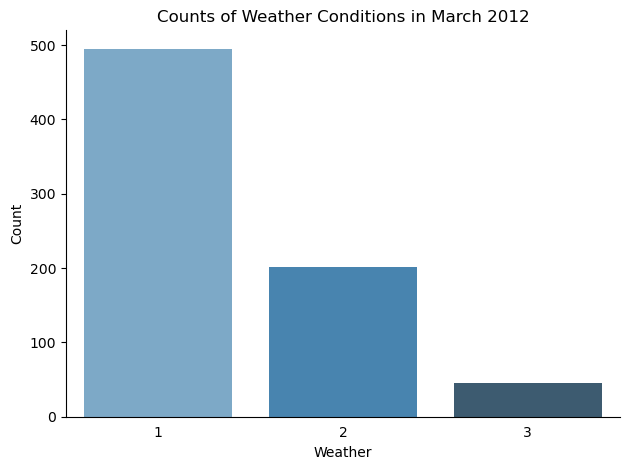

In [ ]:
pf.save_march_weather_barplot(df)

In [ ]:
print('Average temperature in March: ' + str(pf.avg_temp_from_month(df, 3)))
print('Average temperature in April: ' + str(pf.avg_temp_from_month(df, 4)))
print('Average temperature in August: ' + str(pf.avg_temp_from_month(df, 8)))

Average temperature in March: 15.60°C
Average temperature in April: 19.50°C
Average temperature in August: 27.30°C
